# Titanic survival classifier
- http://adataanalyst.com/scikit-learn/decision-trees-scikit-learn/
- will be using 3 features (pclass, sex and age)

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

Populating the interactive namespace from numpy and matplotlib


#### titanic.csv will be shared separately through Slack
- 'survived' 필드가 해당 분류기가 예측해야하는 값을 갖고 있다

In [27]:
df = pd.read_csv('/Users/keeyong//Downloads/2018-march/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
df.isnull().sum().sum()

866

### Training 데이터셋 만들기 (pclass, age, sex)

In [30]:
titanic_X = df[['Pclass', 'Age', 'Sex']].values
titanic_y = df[["Survived"]].values
print (titanic_X[12],titanic_y[12])

[3 20.0 'male'] [0]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15101e0e48>]], dtype=object)

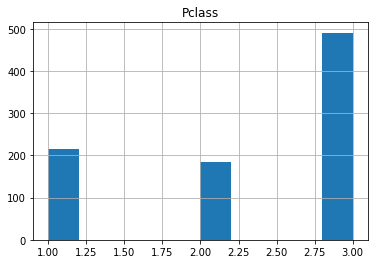

In [31]:
df.hist(column='Pclass')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15101ec908>]], dtype=object)

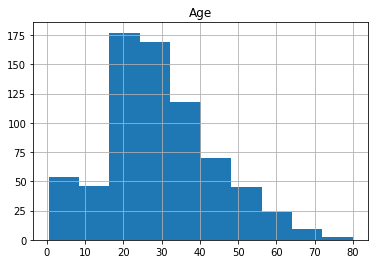

In [32]:
df.hist(column='Age')

In [33]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

#### age 필드의 경우 비어있는 레코드들이 존재. Default 값을 어떻게 할지 결정 필요 -> 평균값 사용

In [62]:
import math

ages = titanic_X[:, 1]
print(ages[5])

29.6991176471


In [65]:
cnt = 0
sum = 0
for age in ages:
    if isinstance(age, float) and not math.isnan(age):
        cnt += 1
        sum += age
print(cnt, sum)
mean_age = sum/cnt
print(mean_age)

891 26461.9138235
29.6991176471


In [64]:
for i in range(len(ages)):
    if math.isnan(ages[i]):
        ages[i] = mean_age
print(ages[5])


29.6991176471


In [66]:
titanic_X[:, 1] = ages
print(titanic_X[5])

[  3.          29.69911765   1.        ]


#### Gender의 값을 스트링에서 숫자로 바꿔준다

In [46]:
# Encode sex 
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(titanic_X[:, 2])
print ("Categorical classes:", label_encoder.classes_)
integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)
t = label_encoder.transform(titanic_X[:, 2])
titanic_X[:, 2] = t

Categorical classes: ['female' 'male']
Integer classes: [0 1]


In [68]:
# Update feature names
feature_names = ['pclass', 'age', 'sex']
# Convert to numerical values
titanic_X = titanic_X.astype(float)
titanic_y = titanic_y.astype(float)

In [69]:
print (feature_names)
print (titanic_X[12],titanic_y[12])

['pclass', 'age', 'sex']
[  3.  20.   1.] [ 0.]


### Model Training

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_X, titanic_y, test_size=0.25, random_state=33)

In [83]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
clf = clf.fit(X_train, y_train)

### Model Validation

In [84]:
clf.score(X_test, y_test)

0.8340807174887892

### Model Prediction

In [73]:
clf.predict([[1, 5, 0]])

array([ 1.])

In [75]:
clf.predict([[3, 39, 1]])

array([ 0.])

### How to Save the model?

In [85]:
import pickle

pkl_filename = "pickle_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(clf, file)

### How to Load the model?

In [86]:
with open(pkl_filename, 'rb') as file:  
    pickle_model = pickle.load(file)

In [88]:
pickle_model.predict([[3, 39, 1]])

array([ 0.])

In [89]:
pickle_model.predict([[1, 5, 0]])

array([ 1.])

In [90]:
pickle_model.score(X_test, y_test)

0.8340807174887892